# Chapter 01 서울시 구별 CCTV 현황 분석
* 서울시의 구별 CCTV 현황 분석
* 어디에 많이 설치됐는지와 구별 인구 대비 비율 확인
* 인구 현황을 보면서 구별 인구 현황에 대해서도 확인

In [1]:
!pip install pandas

In [2]:
import pandas as pd
from google.colab import drive
import sys, os

데이터를 사이트에서 가져오려 했으나 책이 출판된 시점의 데이터와 달라진점이 있어서 그냥 저자 깃허브에서 다운로드해옴

In [3]:
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [4]:
os.chdir('/gdrive/My Drive')
sys.path.append(os.chdir)

## 1.2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 by pandas

### read_csv로 csv파일 불러오기

In [5]:
CCTV_Seoul = pd.read_csv('./data/data_science/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


pandas 데이터는 제일 첫 줄에 보이는 것이 해당 column을 대표하는 일종의 제목임<br/>
그래서 첫 줄을 특별히 column이라고 함.<br/>
데이터 뒤에 columns라고 하면 column의 이름들을 반환함

In [6]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
CCTV_Seoul.columns[0]

'기관명'

rename을 통해 column이름 변경가능<br/>
index도 변환가능

[rename 사용법](https://rfriend.tistory.com/468)

In [8]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True) # key값으로 해당 이름 줘도 상관없음
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### read_excel로 엑셀파일 불러오기

엑셀 파일 읽을때 오류가 있어서 판다스 버전을 다운그래이드하고 다시 읽음

In [9]:
!pip install xlrd=='2.0'

In [10]:
import openpyxl
import xlrd

In [12]:
pop_Seoul = pd.read_excel('./data/data_science/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


필요없는 부분 없애기 위해 옵션 적용

In [13]:
pop_Seoul = pd.read_excel('./data/data_science/01. population_in_Seoul.xls',
                          header = 2,                    # 2로 설정해서 세 번째 줄부터 읽음
                          usecols = 'B, D, G, J, N')  # 엑셀에서는 칼럼 인덱스가 알파벳

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


col 이름 알맞게 변경

In [14]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 1.3 pandas 기초 익히기
[판다스 공식 튜토리얼 사이트](https://pandas.pydata.org/docs/index.html)

In [15]:
import pandas as pd
import numpy as np

### Series
pandas 데이터 유형 중 기초가 되는 Series <br/>
파이썬 list를 전달하여 만듬<br/>
중간에 NaN(Not A Number)도 넣음


In [16]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### date_range
날짜형 데이터인 date_range<br/>
기본 날짜 지정후 periods 옵션으로 6일간의 날짜로 지정<br/>
기본값이 'D'라서 하루씩 증가하는 것으로 보임

In [17]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
6행 4열의 random 변수를 만들고, 컬럼명을 지정한 후 index 명령으로 이전에 만든 dates를 인덱스로 지정

In [18]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216
2013-01-04,1.003830,0.663265,-0.317967,-0.234511
2013-01-05,0.864411,0.023159,1.184735,-1.065749
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472


### head()
기본적으로 첫 5행을 보여주지만 괄호 안에 숫자를 넣어 원하는만큼 출력가능

In [19]:
df.head(3)

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216


### index, columns
데이터 프레임의 컬럼과 인덱스 확인

In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### values
내용 확인

In [22]:
df.values

array([[-1.84072352,  0.51324335, -2.52235985,  1.79464763],
       [ 0.26325979,  1.73797018,  0.60281374,  0.29368969],
       [ 0.99897046,  0.92176381, -0.82301209,  1.94121647],
       [ 1.00382978,  0.66326541, -0.31796705, -0.2345106 ],
       [ 0.86441108,  0.02315889,  1.18473528, -1.06574879],
       [ 0.06637815, -1.08642868, -1.22479539, -0.08647219]])

### info()
데이터 프레임의 개요를 보여줌

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


### describe()
통계적 개요 확인<br/>
value값이 숫자가 아닌 문자여도 그에 맞는 개요가 나타남

In [24]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.226021,0.462162,-0.516764,0.440470
std,1.087040,0.945815,1.327071,1.192438
min,-1.840724,-1.086429,-2.522360,-1.065749
25%,0.115599,0.145680,-1.124350,-0.197501
50%,0.563835,0.588254,-0.570490,0.103609
75%,0.965331,0.857139,0.372619,1.419408
max,1.003830,1.737970,1.184735,1.941216


### sort_values()
by로 지정된 칼럼을 기준으로 정렬<br/>
ascending 변수로 내림차순이나 오름차순 정렬 선택, 기본값은 오름차순

In [25]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216
2013-01-04,1.003830,0.663265,-0.317967,-0.234511
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-05,0.864411,0.023159,1.184735,-1.065749
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472


In [26]:
df

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216
2013-01-04,1.003830,0.663265,-0.317967,-0.234511
2013-01-05,0.864411,0.023159,1.184735,-1.065749
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472


### DataFrame['col']
해당 칼럼을 Series로 보여줌

In [27]:
df['A']

2013-01-01   -1.840724
2013-01-02    0.263260
2013-01-03    0.998970
2013-01-04    1.003830
2013-01-05    0.864411
2013-01-06    0.066378
Freq: D, Name: A, dtype: float64

### DataFrame[a:b]
a:b 사이의 행을 보여줌

In [29]:
df[0:3]

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216


In [31]:
df[0:1]

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.52236,1.794648


In [32]:
# 행 인덱스
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.26326,1.737970,0.602814,0.293690
2013-01-03,0.99897,0.921764,-0.823012,1.941216
2013-01-04,1.00383,0.663265,-0.317967,-0.234511


### loc[]

In [33]:
# 특정 행의 데이터
df.loc[dates[0]]

A   -1.840724
B    0.513243
C   -2.522360
D    1.794648
Name: 2013-01-01 00:00:00, dtype: float64

In [34]:
# 여러 열의 행
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.840724,0.513243
2013-01-02,0.263260,1.737970
2013-01-03,0.998970,0.921764
2013-01-04,1.003830,0.663265
2013-01-05,0.864411,0.023159
2013-01-06,0.066378,-1.086429


In [35]:
# 범위 지정
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.26326,1.737970
2013-01-03,0.99897,0.921764
2013-01-04,1.00383,0.663265


In [36]:
df.loc['20130102', ['A', 'B']]

A    0.26326
B    1.73797
Name: 2013-01-02 00:00:00, dtype: float64

In [37]:
df.loc[dates[0], 'A']

-1.8407235240373065

### iloc[]
loc에서는 행과 열의 번호만으로 데이터에 접근할 수 없지만,<br/>
iloc에서는 가능하다.

In [39]:
# 단순 숫자 표시는 행번호
df.iloc[3]

A    1.003830
B    0.663265
C   -0.317967
D   -0.234511
Name: 2013-01-04 00:00:00, dtype: float64

In [40]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.003830,0.663265
2013-01-05,0.864411,0.023159


In [41]:
# 리스트 전달로 원하는 행이나 열 지정
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.263260,0.602814
2013-01-03,0.998970,-0.823012
2013-01-05,0.864411,1.184735


In [42]:
# 전체는 :
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.26326,1.737970,0.602814,0.293690
2013-01-03,0.99897,0.921764,-0.823012,1.941216


In [43]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.513243,-2.522360
2013-01-02,1.737970,0.602814
2013-01-03,0.921764,-0.823012
2013-01-04,0.663265,-0.317967
2013-01-05,0.023159,1.184735
2013-01-06,-1.086429,-1.224795


In [44]:
df

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216
2013-01-04,1.003830,0.663265,-0.317967,-0.234511
2013-01-05,0.864411,0.023159,1.184735,-1.065749
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472


### 특정 조건 만족 데이터

In [45]:
df.A

2013-01-01   -1.840724
2013-01-02    0.263260
2013-01-03    0.998970
2013-01-04    1.003830
2013-01-05    0.864411
2013-01-06    0.066378
Freq: D, Name: A, dtype: float64

In [46]:
df['A']

2013-01-01   -1.840724
2013-01-02    0.263260
2013-01-03    0.998970
2013-01-04    1.003830
2013-01-05    0.864411
2013-01-06    0.066378
Freq: D, Name: A, dtype: float64

In [47]:
# col A에서 0보다 큰 행
df[df.A > 0]

,A,B,C,D
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216
2013-01-04,1.003830,0.663265,-0.317967,-0.234511
2013-01-05,0.864411,0.023159,1.184735,-1.065749
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472


In [49]:
# 데이터 전체에서 조건을 걸면 만족하지 않는 곳은 NaN 처리됨
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.513243,NaN,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,NaN,1.941216
2013-01-04,1.003830,0.663265,NaN,NaN
2013-01-05,0.864411,0.023159,1.184735,NaN
2013-01-06,0.066378,NaN,NaN,NaN


DataFrame을 복사할 때 = 기호로 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 위치만 복사되기 때문에 원본 데이터는 하나만 있게됨.<br/>
copy() 함수를 사용하면 데이터의 내용까지 복사함

In [50]:
df2 = df.copy()

In [52]:
# 새로운 칼럼 추가
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.840724,0.513243,-2.522360,1.794648,one
2013-01-02,0.263260,1.737970,0.602814,0.293690,one
2013-01-03,0.998970,0.921764,-0.823012,1.941216,two
2013-01-04,1.003830,0.663265,-0.317967,-0.234511,three
2013-01-05,0.864411,0.023159,1.184735,-1.065749,four
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472,three


### isin()
원하는 요소가 있는지 확인

In [54]:
df2['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [55]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.998970,0.921764,-0.823012,1.941216,two
2013-01-05,0.864411,0.023159,1.184735,-1.065749,four


In [56]:
df

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,0.263260,1.737970,0.602814,0.293690
2013-01-03,0.998970,0.921764,-0.823012,1.941216
2013-01-04,1.003830,0.663265,-0.317967,-0.234511
2013-01-05,0.864411,0.023159,1.184735,-1.065749
2013-01-06,0.066378,-1.086429,-1.224795,-0.086472


### apply()
통계 느낌의 데이터를 볼 때 유용함

In [57]:
# 누적합
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-1.840724,0.513243,-2.522360,1.794648
2013-01-02,-1.577464,2.251214,-1.919546,2.088337
2013-01-03,-0.578493,3.172977,-2.742558,4.029554
2013-01-04,0.425337,3.836243,-3.060525,3.795043
2013-01-05,1.289748,3.859402,-1.875790,2.729294
2013-01-06,1.356126,2.772973,-3.100585,2.642822


In [58]:
# 최대값과 최소값의 차이
df.apply(lambda x: x.max() - x.min())

A    2.844553
B    2.824399
C    3.707095
D    3.006965
dtype: float64

## 1.4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

### CCTV 현황 정리

In [59]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


소계 기준으로 정렬

In [60]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


위를 봤을때 도봉구, 마포구, 송파구등이 cctv가 가장 적은것을 볼수있음.<br/>
강남 3구 중 하나인 송파구가 CCTV가 가장 적은 구 중 하나라는것이 조금 의아함.<br/>
또한 송파구는 범죄율이 결코 낮은구가 아님에도 CCTV가 적음(범죄율은 2장에서 나옴)

In [62]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


CCTV가 가장 많은 구는 강남구, 양천구, 서초구 이다

2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 최근 3년간 CCTV 증가율 계산

In [65]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                            CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 인구 현황 정리

In [66]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


합계는 필요없어서 drop() 함수로 제거

In [67]:
pop_Seoul.drop([0], inplace=True) # axis 기본값은 0
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


구별 칼럼의 unique 조사

In [68]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

NaN 데이터 체크

In [69]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [70]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


구별 외국인비율과 고령자비율 계산

In [72]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


인구수로 정렬

In [73]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


외국인, 외국인 비율 정렬

In [74]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [76]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


고령자, 고령자 비율 정렬

In [77]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [78]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 1.5 pandas 고급 기능 - 두 DataFrame 병합하기

우선 pandas의 고급 기능 중 하나를 알아보기

In [80]:
# 연습용 데이터 3개 생성

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [81]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [82]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [83]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### concat()
열 방향으로 단순히 합침

In [85]:
# 아무 옵션 없이 그냥 사용하면 열 방향으로 병합
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [87]:
# keys 업션으로 구분
# 다중 index가 생성되어 level을 형성함
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [89]:
# 다중인덱스 확인
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [90]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [91]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [92]:
# 연습용 데이터 추가 생성
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
result = pd.concat([df1, df4], axis=1)

In [93]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [94]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


concat 명령은 index를 기준으로 데이터를 합치기 떄문에 위와 같은 데이터프레임을 얻을 수 있다.<br/>
이때 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner' 옵션임.

In [96]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


join_axes=[df1.index] 옵션으로 df1의 인덱스에 맞출 수도 있음.<br/>
이제는 reindex 함수 써야됨

In [98]:
# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index]) # join_axes 함수는 없어진걸로 보임
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


열 방향으로 합치면서 ignore_index=True로 하면 두 데이터의 index를 무시하고 합친 후 다시 index를 부여함.<br/>
이때는 열을 기준으로 합치게 됨

In [99]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


다른 명령 학습을 위한 데이터 두 개 생성

In [100]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [101]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [102]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


두 데이터에 공통으로 있는 칼럼임 key를 기준으로 merge 명령에서 merge 기준을 설정하는 on 옵션으로 합치면 공통된 key에 대해서만 합치게 됨

In [103]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


how 옵션으로 한쪽 데이터를 설정해서 합칠 수도 있음

In [104]:
# left
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [105]:
# right
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


merge한 데이터 결과를 모두 가지는 outer 옵션도 존재

In [106]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [107]:
# inner는 기본값이긴함
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## 1.6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

'구별'을 기준으로 CCTV 데이터와 인구 현황 데이터 합치기

In [108]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


의미 없는 칼럼 삭제<br/>
행 방향 삭제는 drop이고 열 방향 삭제는 del

In [109]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


나중에 그래프 그릴떄를 생각해서 index를 구 이름으로 설정<br/>
set_index를 통해 설정가능

In [110]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 상관분석
    아직은 배운것이 많지않아 고령자비율, 외국인비율, 인구수 중에서 선택한 데이터와
    CCTV를 비교할 예정임.
    상관계수를 통해서 결정할건데 상관계수에 대한 수치의 의미는 다음과 같음

    r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

    numpy의 corrcoef 명령을 통해 구할 수 있음.
    결과는 행렬로 나옴.

In [111]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [112]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [113]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

CCTV와 인구수 사이에 약한 상관관계가 보임

In [114]:
# cctv 설치수 정렬
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [115]:
# 인구수 정렬
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


둘을 시각적으로 비교해보면 좋을 것 같음

## 1.7 파이썬의 대표 시각화 도구 - MatPlotlib

In [118]:
import matplotlib.pyplot as plt
# 코랩에서는 굳이 안적어줘도 되긴함
%matplotlib inline

간단한 예시 그래프

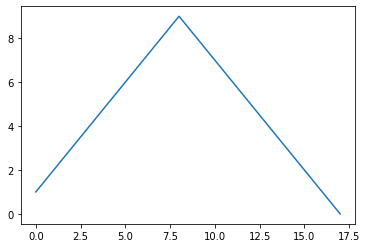

In [119]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [120]:
# sin 그래프
import numpy as np
t = np.arange(0, 12, 0.01)
y = np.sin(t)

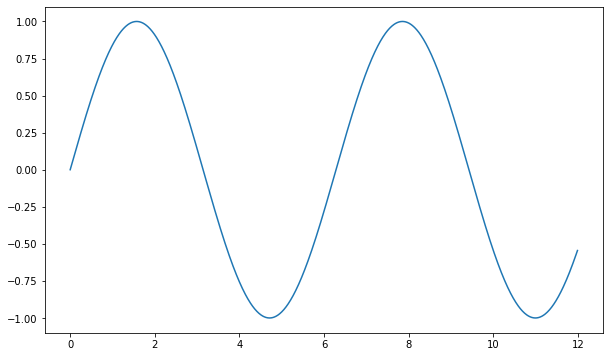

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.show()

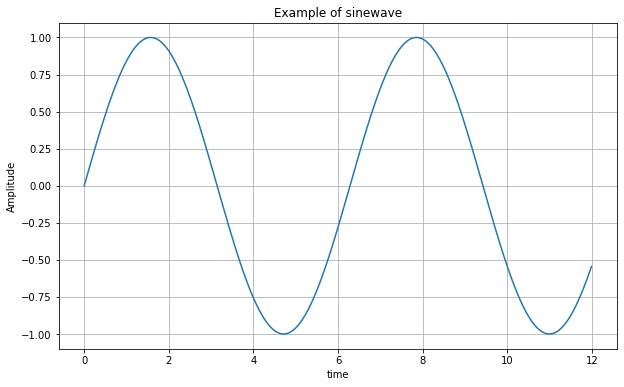

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid() # 격자 추가
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

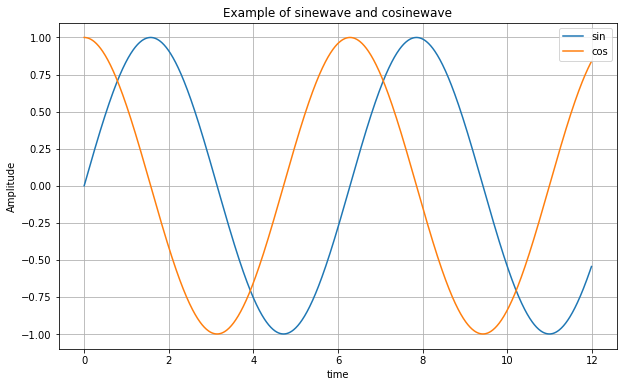

In [125]:
# sin cos 
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave and cosinewave')
plt.legend(['sin', 'cos'])  # 추가한 부분
plt.show()

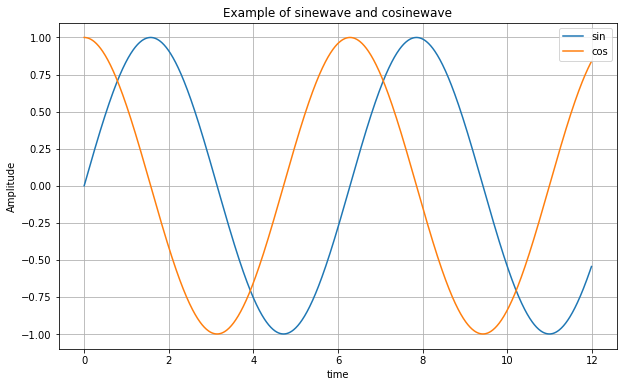

In [126]:
# legend 위랑 다른 사용
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave and cosinewave')
plt.show()

lw 옵션으로 선의 굻기 조정<br/>
color 옵션으로 색상 지정

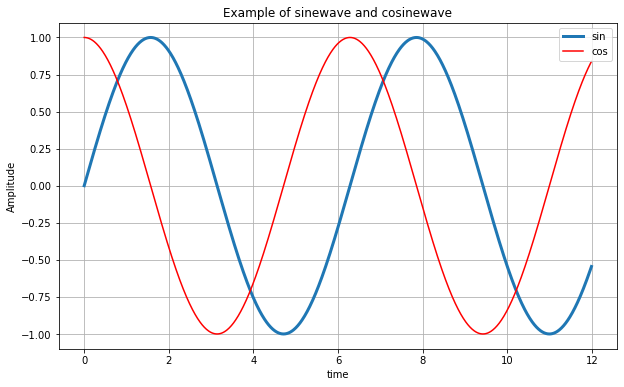

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave and cosinewave')
plt.show()

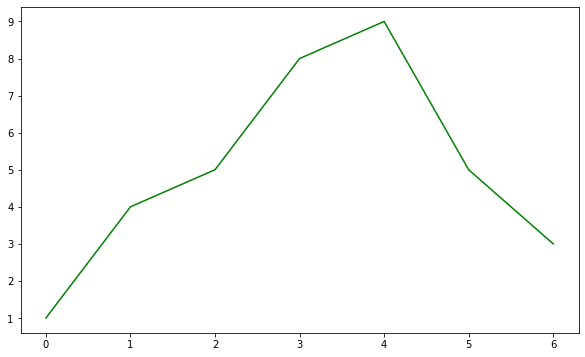

In [128]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green')
plt.show()

linestyle

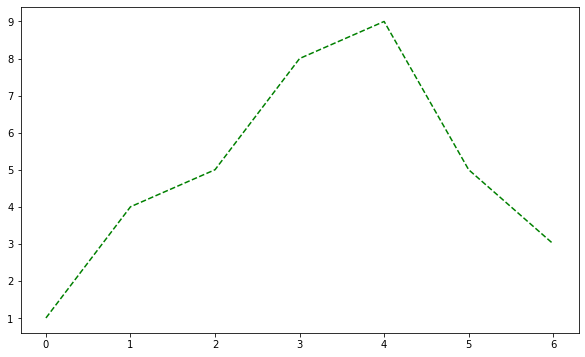

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

marker 옵션으로 데이터가 존재하는 곳에 마킹 가능

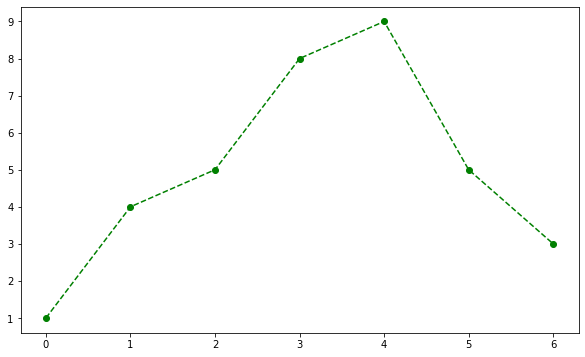

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

markerfacecolor, markersize 옵션으로 마커의 크기와 색상 지정가능

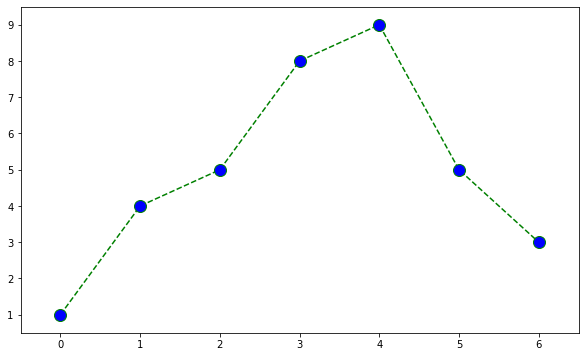

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor = 'blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

선을 그리는 plot 명령외에 scatter 명령도 존재

In [133]:
t = np.arange(0, 10, 1)
y = np.array([9,8,7,9,8,3,2,4,3,4])

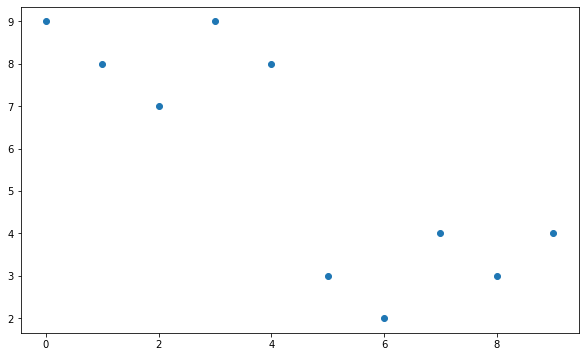

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(t, y)
plt.show()

marker 지정 가능

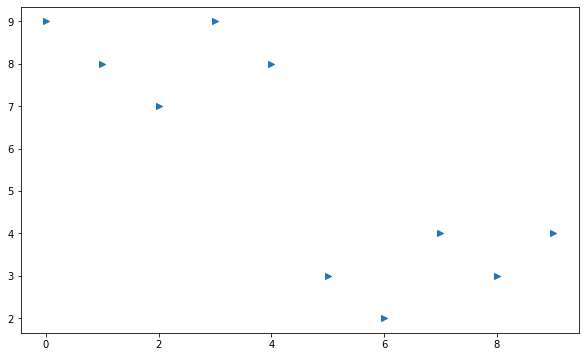

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(t, y, marker='>')
plt.show()

x 축 값에 따라 색상을 바꾸는 color map 지정 가능(이때 s는 마커의 크기)

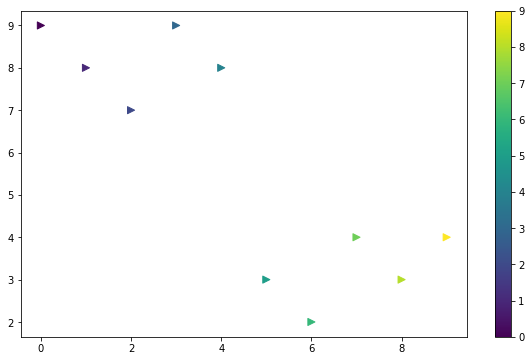

In [136]:
colormap = t

plt.figure(figsize=(10, 6))
plt.scatter(t, y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

예제 데이터 세 개 생성<br/>
이때 loc는 평균값, scale은 표준편차

In [137]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

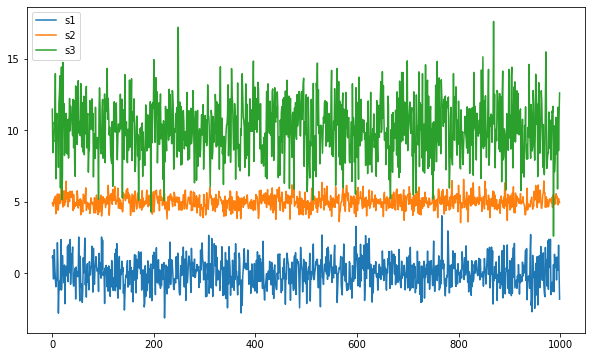

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

### boxplot으로 표현
여기서는 간단하게 소개

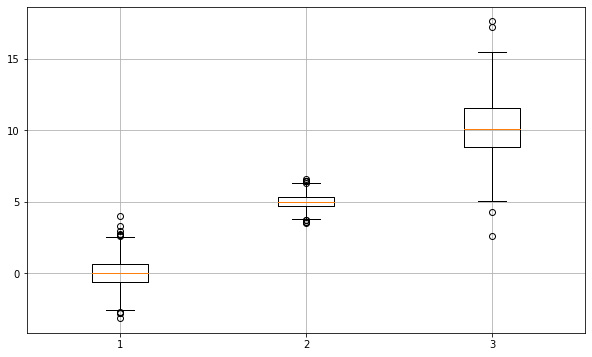

In [141]:
plt.figure(figsize=(10, 6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()